In [1]:
#Imports
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats


In [2]:
from scipy.stats import linregress

In [7]:
#asthmaERLoc='../Datasets/rawAsthmaERChildren.csv'
asthmaERLoc='../Datasets/childrenasthmaer.csv'

aqiLoc='../Datasets/aqi.csv'

asthmaERDf = pd.read_csv(asthmaERLoc, header=[0])
aqiDf=pd.read_csv(aqiLoc)

In [8]:
asthmaERDf.head()


,County,2010,2011,2012,2013,2014,2015,2016,2017,Selected Years Total
0,Appling,317.6,320.3,402.9,423,366.8,287.2,385.3,329.4,354.1
1,Atkinson,442.3,190.2,543.2,506.6,729.7,381,350.5,335.7,434
2,Bacon,478.5,357,580.5,454.7,443.2,398.3,299,353.4,420.2
3,Baker,644.2,421.4,386.2,778.2,768,"1,037.70",825.4,750,700.2
4,Baldwin,557.6,594.4,875.6,697.2,653.5,569.7,715.5,558.9,653.6


In [9]:
#access double row header
asthmaERDf['2010'].head()

0    317.6
1    442.3
2    478.5
3    644.2
4    557.6
Name: 2010, dtype: object

In [10]:
aqiGADf=aqiDf[(aqiDf['State']=='Georgia')]

In [11]:
aqiGADf.head(2)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
185,Georgia,Bibb,2017,365,284,81,0,0,0,0,93,58,40,0,0,163,0,202,0
186,Georgia,Charlton,2017,47,43,4,0,0,0,0,89,47,25,0,0,0,0,47,0


In [12]:
len(aqiGADf.County.unique())

32

In [13]:
aqiGADf['County'].head()

185         Bibb
186     Charlton
187      Chatham
188    Chattooga
189       Clarke
Name: County, dtype: object

In [14]:
aqiGADf.columns.str.contains('ozone', case=False)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [15]:
aqiGADf.columns[aqiGADf.columns.str.contains('ozone', case=False)]

Index(['Days Ozone'], dtype='object')

In [16]:
aqiGADf['Days Ozone'].head()

185    163
186      0
187    100
188    240
189    188
Name: Days Ozone, dtype: int64

In [17]:
aqiGADf.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [18]:
aqiGADf.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
185,Georgia,Bibb,2017,365,284,81,0,0,0,0,93,58,40,0,0,163,0,202,0
186,Georgia,Charlton,2017,47,43,4,0,0,0,0,89,47,25,0,0,0,0,47,0
187,Georgia,Chatham,2017,365,289,76,0,0,0,0,84,57,38,0,0,100,35,230,0
188,Georgia,Chattooga,2017,240,232,8,0,0,0,0,64,45,36,0,0,240,0,0,0
189,Georgia,Clarke,2017,360,314,46,0,0,0,0,97,53,38,0,0,188,0,172,0


In [19]:
aqiGADf=aqiGADf.drop(columns='State')
aqiGADf=aqiGADf.set_index('County')

In [20]:
aqiGADf.head()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
County,,,,,,,,,,,,,,,,,
Bibb,2017,365,284,81,0,0,0,0,93,58,40,0,0,163,0,202,0
Charlton,2017,47,43,4,0,0,0,0,89,47,25,0,0,0,0,47,0
Chatham,2017,365,289,76,0,0,0,0,84,57,38,0,0,100,35,230,0
Chattooga,2017,240,232,8,0,0,0,0,64,45,36,0,0,240,0,0,0
Clarke,2017,360,314,46,0,0,0,0,97,53,38,0,0,188,0,172,0


In [21]:
#aqiGADf['Year']=aqiGADf[str('Year')]

In [22]:
aqiGADfPivot=aqiGADf.pivot(columns='Year')

In [23]:
aqiGADfPivot.head()

Days with AQI                                                   \
Year               2010   2011   2012   2013   2014   2015   2016   2017   
County                                                                     
Bibb              364.0  364.0  366.0  365.0  365.0  365.0  366.0  365.0   
Charlton          119.0  115.0  116.0  117.0  116.0  119.0  117.0   47.0   
Chatham           365.0  365.0  366.0  365.0  365.0  365.0  366.0  365.0   
Chattooga         264.0  256.0  265.0  244.0  245.0  191.0  242.0  240.0   
Clarke            365.0  365.0  366.0  365.0  356.0  358.0  362.0  360.0   

          Good Days        ...  Days PM2.5        Days PM10                   \
Year           2010   2011 ...        2016   2017      2010  2011  2012 2013   
County                     ...                                                 
Bibb          160.0  174.0 ...       219.0  202.0       1.0   0.0   0.0  0.0   
Charlton      107.0   93.0 ...       117.0   47.0       0.0   0.0   0.0  0.0   
Chatham       183.0  176.0 ...       191.0  230.0       0.0   0.0   0.0  0.0   
Chattooga     203.0  202.0 ...         0.0    0.0      22.0  19.0  20.0  0.0   
Clarke        205.0  212.0 ...       171.0  172.0       0.0   0.0   0.0  0.0   

                               
Year      2014 2015 2016 2017  
County                         
Bibb       0.0  0.0  0.0  0.0  
Charlton   0.0  0.0  0.0  0.0  
Chatham    0.0  0.0  0.0  0.0  
Chattooga  0.0  0.0  0.0  0.0  
Clarke     0.0  0.0  0.0  0.0  

[5 rows x 128 columns]

In [24]:
#aqiGADfPivot.columns = aqiGADfPivot.columns.astype(str)
#aqiGADfPivot.columns = aqiGADfPivot.columns.map(str)

In [25]:
#aqiGADfPivot.columns=['_'.join(col) for col in aqiGADfPivot.columns]

In [26]:
aqiGADfPivot.columns


MultiIndex(levels=[['Days with AQI', 'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI', '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4

In [27]:
ozonePM10AndDaysGAAll= aqiGADfPivot[['Days with AQI','Days Ozone','Days PM10']]

In [28]:
ozonePM10AndDaysGAAll.head()

Days with AQI                                                   \
Year               2010   2011   2012   2013   2014   2015   2016   2017   
County                                                                     
Bibb              364.0  364.0  366.0  365.0  365.0  365.0  366.0  365.0   
Charlton          119.0  115.0  116.0  117.0  116.0  119.0  117.0   47.0   
Chatham           365.0  365.0  366.0  365.0  365.0  365.0  366.0  365.0   
Chattooga         264.0  256.0  265.0  244.0  245.0  191.0  242.0  240.0   
Clarke            365.0  365.0  366.0  365.0  356.0  358.0  362.0  360.0   

          Days Ozone        ...                Days PM10                   \
Year            2010   2011 ...    2016   2017      2010  2011  2012 2013   
County                      ...                                             
Bibb            73.0  101.0 ...   146.0  163.0       1.0   0.0   0.0  0.0   
Charlton         0.0    0.0 ...     0.0    0.0       0.0   0.0   0.0  0.0   
Chatham         91.0   75.0 ...   135.0  100.0       0.0   0.0   0.0  0.0   
Chattooga      242.0  237.0 ...   242.0  240.0      22.0  19.0  20.0  0.0   
Clarke         137.0  160.0 ...   191.0  188.0       0.0   0.0   0.0  0.0   

                               
Year      2014 2015 2016 2017  
County                         
Bibb       0.0  0.0  0.0  0.0  
Charlton   0.0  0.0  0.0  0.0  
Chatham    0.0  0.0  0.0  0.0  
Chattooga  0.0  0.0  0.0  0.0  
Clarke     0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

In [29]:
ozonePM10AndDaysGAAll.columns = ['_'.join(tuple(map(str, t))) for t in ozonePM10AndDaysGAAll.columns.values]

In [30]:
ozonePM10AndDaysGAAll=ozonePM10AndDaysGAAll.reset_index()

In [31]:
ozonePM10AndDaysGAAll['County']

0           Bibb
1       Charlton
2        Chatham
3      Chattooga
4         Clarke
5        Clayton
6           Cobb
7         Coffee
8       Columbia
9         Coweta
10        Dawson
11        DeKalb
12     Dougherty
13       Douglas
14         Floyd
15        Fulton
16         Glynn
17      Gwinnett
18          Hall
19         Henry
20       Houston
21       Lowndes
22        Murray
23      Muscogee
24      Paulding
25          Pike
26      Richmond
27      Rockdale
28        Sumter
29        Walker
30    Washington
31     Wilkinson
Name: County, dtype: object

In [32]:
asthmaERDf.head()

,County,2010,2011,2012,2013,2014,2015,2016,2017,Selected Years Total
0,Appling,317.6,320.3,402.9,423,366.8,287.2,385.3,329.4,354.1
1,Atkinson,442.3,190.2,543.2,506.6,729.7,381,350.5,335.7,434
2,Bacon,478.5,357,580.5,454.7,443.2,398.3,299,353.4,420.2
3,Baker,644.2,421.4,386.2,778.2,768,"1,037.70",825.4,750,700.2
4,Baldwin,557.6,594.4,875.6,697.2,653.5,569.7,715.5,558.9,653.6


In [31]:
#asthmaERDf.columns=['_'.join(col) for col in asthmaERDf.columns]

In [33]:
asthmaERDf['County']
#asthmaERDf.columns

0             Appling
1            Atkinson
2               Bacon
3               Baker
4             Baldwin
5               Banks
6              Barrow
7              Bartow
8            Ben Hill
9             Berrien
10               Bibb
11           Bleckley
12           Brantley
13             Brooks
14              Bryan
15            Bulloch
16              Burke
17              Butts
18            Calhoun
19             Camden
20            Candler
21            Carroll
22            Catoosa
23           Charlton
24            Chatham
25      Chattahoochee
26          Chattooga
27           Cherokee
28             Clarke
29               Clay
            ...      
130        Taliaferro
131          Tattnall
132            Taylor
133           Telfair
134           Terrell
135            Thomas
136              Tift
137            Toombs
138             Towns
139          Treutlen
140             Troup
141            Turner
142            Twiggs
143             Union
144       

In [35]:
for year in np.arange(2010,2018):
    asthmaERDf[f'{year}']=asthmaERDf[f'{year}'].str.replace(',','')
    asthmaERDf[f'{year}']=asthmaERDf[f'{year}'].str.replace('*','')
    asthmaERDf[f'{year}']=pd.to_numeric(asthmaERDf[f'{year}'], errors='coerce')
    

In [36]:
#  asthmaERDf['2017_ER Visits']=asthmaERDf['2017_ER Visits'].str.replace(',','')
#  asthmaERDf['2017_ER Visits']=pd.to_numeric(asthmaERDf['2017_ER Visits'])

In [37]:
asthmaERDf.dtypes

County                   object
2010                    float64
2011                    float64
2012                    float64
2013                    float64
2014                    float64
2015                    float64
2016                    float64
2017                    float64
Selected Years Total     object
dtype: object

In [38]:
asthmaERDf['2016'].head()

0    385.3
1    350.5
2    299.0
3    825.4
4    715.5
Name: 2016, dtype: float64

In [39]:
# asthmaERDf['2016_ER Visit Rate']=asthmaERDf['2016_ER Visit Rate'].str.replace('*','')

In [40]:
# asthmaERDf['2016_ER Visit Rate']=pd.to_numeric(asthmaERDf['2016_ER Visit Rate'],errors='coerce' )

In [41]:
gaAQIAndAsthmaER=asthmaERDf.merge(ozonePM10AndDaysGAAll, left_on=['County'], right_on=['County'], how='inner')

In [66]:
gaAQIAndAsthmaERN=gaAQIAndAsthmaER.dropna(axis=0, how='any', inplace=False)

In [68]:
gaAQIAndAsthmaERN.count()

County                  30
2010                    30
2011                    30
2012                    30
2013                    30
2014                    30
2015                    30
2016                    30
2017                    30
Selected Years Total    30
Days with AQI_2010      30
Days with AQI_2011      30
Days with AQI_2012      30
Days with AQI_2013      30
Days with AQI_2014      30
Days with AQI_2015      30
Days with AQI_2016      30
Days with AQI_2017      30
Days Ozone_2010         30
Days Ozone_2011         30
Days Ozone_2012         30
Days Ozone_2013         30
Days Ozone_2014         30
Days Ozone_2015         30
Days Ozone_2016         30
Days Ozone_2017         30
Days PM10_2010          30
Days PM10_2011          30
Days PM10_2012          30
Days PM10_2013          30
Days PM10_2014          30
Days PM10_2015          30
Days PM10_2016          30
Days PM10_2017          30
ozoneDivTotal_2010      30
ozoneDivTotal_2011      30
ozoneDivTotal_2012      30
o

In [69]:
gaAQIAndAsthmaERN['County'].count

<bound method Series.count of 0           Bibb
1       Charlton
2        Chatham
3      Chattooga
4         Clarke
5        Clayton
6           Cobb
7         Coffee
8       Columbia
9         Coweta
10        Dawson
11        DeKalb
12     Dougherty
13       Douglas
14         Floyd
15        Fulton
16         Glynn
17      Gwinnett
18          Hall
19         Henry
20       Houston
21       Lowndes
22        Murray
23      Muscogee
24      Paulding
26      Richmond
27      Rockdale
28        Sumter
29        Walker
30    Washington
Name: County, dtype: object>

In [70]:
#gaAQIAndAsthmaER=gaAQIAndAsthmaER.drop(columns='County')
gaAQIAndAsthmaERN['Days Ozone_2015'].head()

0    124.0
1      0.0
2    107.0
3    191.0
4    148.0
Name: Days Ozone_2015, dtype: float64

In [71]:
gaAQIAndAsthmaERN.head()

,County,2010,2011,2012,2013,2014,2015,2016,2017,Selected Years Total,...,Days PM10_2016,Days PM10_2017,ozoneDivTotal_2010,ozoneDivTotal_2011,ozoneDivTotal_2012,ozoneDivTotal_2013,ozoneDivTotal_2014,ozoneDivTotal_2015,ozoneDivTotal_2016,ozoneDivTotal_2017
0,Bibb,619.1,579.8,650.0,636.0,662.1,668.7,866.7,926.3,700.2,...,0.0,0.0,0.200549,0.277473,0.286885,0.276712,0.200000,0.339726,0.398907,0.446575
1,Charlton,420.2,335.3,293.3,286.7,209.4,177.4,152.0,141.6,252,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Chatham,701.5,704.5,802.4,753.9,650.7,585.8,618.5,629.6,679.6,...,0.0,0.0,0.249315,0.205479,0.243169,0.238356,0.145205,0.293151,0.368852,0.273973
3,Chattooga,272.9,229.3,373.2,326.2,401.0,256.8,318.2,230.1,300.9,...,0.0,0.0,0.916667,0.925781,0.924528,1.000000,1.000000,1.000000,1.000000,1.000000
4,Clarke,351.4,378.4,424.9,464.3,454.0,447.9,489.1,465.1,435.4,...,0.0,0.0,0.375342,0.438356,0.382514,0.257534,0.303371,0.413408,0.527624,0.522222


In [48]:
# gaOzoneAndAsthmaERR=gaOzoneAndAsthmaER.rename(columns={
#     2010:'2010_OzoneD',2011:'2011_OzoneD',
#     2012:'2012_OzoneD',2013:'2013_OzoneD',
#     2014:'2014_OzoneD',2015:'2015_OzoneD',
#     2016:'2016_OzoneD',2017:'2017_OzoneD'
# })
# #gaOzoneAndAsthmaER[2017]

In [72]:
gaAQIAndAsthmaERN.columns

Index(['County', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'Selected Years Total', 'Days with AQI_2010',
       'Days with AQI_2011', 'Days with AQI_2012', 'Days with AQI_2013',
       'Days with AQI_2014', 'Days with AQI_2015', 'Days with AQI_2016',
       'Days with AQI_2017', 'Days Ozone_2010', 'Days Ozone_2011',
       'Days Ozone_2012', 'Days Ozone_2013', 'Days Ozone_2014',
       'Days Ozone_2015', 'Days Ozone_2016', 'Days Ozone_2017',
       'Days PM10_2010', 'Days PM10_2011', 'Days PM10_2012', 'Days PM10_2013',
       'Days PM10_2014', 'Days PM10_2015', 'Days PM10_2016', 'Days PM10_2017',
       'ozoneDivTotal_2010', 'ozoneDivTotal_2011', 'ozoneDivTotal_2012',
       'ozoneDivTotal_2013', 'ozoneDivTotal_2014', 'ozoneDivTotal_2015',
       'ozoneDivTotal_2016', 'ozoneDivTotal_2017'],
      dtype='object')

In [78]:
gaAQIAndAsthmaERN

,County,2010,2011,2012,2013,2014,2015,2016,2017,Selected Years Total,...,Days PM10_2016,Days PM10_2017,ozoneDivTotal_2010,ozoneDivTotal_2011,ozoneDivTotal_2012,ozoneDivTotal_2013,ozoneDivTotal_2014,ozoneDivTotal_2015,ozoneDivTotal_2016,ozoneDivTotal_2017
0,Bibb,619.1,579.8,650.0,636.0,662.1,668.7,866.7,926.3,700.2,...,0.0,0.0,0.200549,0.277473,0.286885,0.276712,0.200000,0.339726,0.398907,0.446575
1,Charlton,420.2,335.3,293.3,286.7,209.4,177.4,152.0,141.6,252,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Chatham,701.5,704.5,802.4,753.9,650.7,585.8,618.5,629.6,679.6,...,0.0,0.0,0.249315,0.205479,0.243169,0.238356,0.145205,0.293151,0.368852,0.273973
3,Chattooga,272.9,229.3,373.2,326.2,401.0,256.8,318.2,230.1,300.9,...,0.0,0.0,0.916667,0.925781,0.924528,1.000000,1.000000,1.000000,1.000000,1.000000
4,Clarke,351.4,378.4,424.9,464.3,454.0,447.9,489.1,465.1,435.4,...,0.0,0.0,0.375342,0.438356,0.382514,0.257534,0.303371,0.413408,0.527624,0.522222
5,Clayton,758.8,808.3,965.8,807.7,780.1,682.6,737.1,763.8,787.1,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cobb,469.1,479.4,530.9,529.8,525.0,480.8,504.0,461.9,497.6,...,0.0,0.0,0.383285,0.403785,0.408333,0.377465,0.130293,0.434540,0.504274,0.792254
7,Coffee,609.5,184.3,604.6,779.7,817.5,505.7,495.2,430.1,553.4,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Columbia,250.8,252.9,221.1,250.3,260.0,215.9,234.0,243.4,240.8,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,Coweta,370.4,369.5,500.3,262.8,329.0,324.4,419.1,349.4,365.2,...,0.0,0.0,0.287671,0.350685,0.228022,0.282192,0.305322,0.389041,0.486339,0.471519


In [76]:
for year in np.arange(2010,2018):
    gaAQIAndAsthmaERN.loc[f'ozoneDivTotal_{year}']=(gaAQIAndAsthmaERN.loc[f'Days Ozone_{year}']/gaAQIAndAsthmaERN.loc[f'Days with AQI_{year}'] )

KeyError: 'the label [Days Ozone_2010] is not in the [index]'

In [79]:
#gaAQIAndAsthmaER['ozoneVisits2010']
gaAQIAndAsthmaERN.columns[gaAQIAndAsthmaERN.columns.str.contains('ozone', case=False)]

Index(['Days Ozone_2010', 'Days Ozone_2011', 'Days Ozone_2012',
       'Days Ozone_2013', 'Days Ozone_2014', 'Days Ozone_2015',
       'Days Ozone_2016', 'Days Ozone_2017', 'ozoneDivTotal_2010',
       'ozoneDivTotal_2011', 'ozoneDivTotal_2012', 'ozoneDivTotal_2013',
       'ozoneDivTotal_2014', 'ozoneDivTotal_2015', 'ozoneDivTotal_2016',
       'ozoneDivTotal_2017'],
      dtype='object')

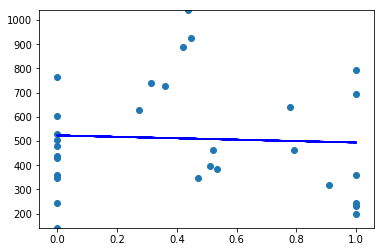

In [80]:
plt.scatter(gaAQIAndAsthmaERN['ozoneDivTotal_2017'],gaAQIAndAsthmaERN['2017']) 
plt.ylim(gaAQIAndAsthmaER['2017'].min(),gaAQIAndAsthmaER['2017'].max())

(slope, intercept, p, r, _) = linregress(gaAQIAndAsthmaERN['ozoneDivTotal_2017'], gaAQIAndAsthmaERN['2017'])
fit = slope * gaAQIAndAsthmaERN['ozoneDivTotal_2017'] + intercept
plt.plot(gaAQIAndAsthmaERN['ozoneDivTotal_2017'], fit,'b--')
#plt.legend()

In [81]:
slope, p, r

(-29.371739271470716, -0.05023816685035526, 0.7920574098408466)

In [62]:
#gaAQIAndAsthmaER[['County','2010','2011','2012','2013','2014','2015','2016','2017']]
#asthmaERDf


,County,2010,2011,2012,2013,2014,2015,2016,2017
0,Bibb,619.1,579.8,650.0,636.0,662.1,668.7,866.7,926.3
1,Charlton,420.2,335.3,293.3,286.7,209.4,177.4,152.0,141.6
2,Chatham,701.5,704.5,802.4,753.9,650.7,585.8,618.5,629.6
3,Chattooga,272.9,229.3,373.2,326.2,401.0,256.8,318.2,230.1
4,Clarke,351.4,378.4,424.9,464.3,454.0,447.9,489.1,465.1
5,Clayton,758.8,808.3,965.8,807.7,780.1,682.6,737.1,763.8
6,Cobb,469.1,479.4,530.9,529.8,525.0,480.8,504.0,461.9
7,Coffee,609.5,184.3,604.6,779.7,817.5,505.7,495.2,430.1
8,Columbia,250.8,252.9,221.1,250.3,260.0,215.9,234.0,243.4
9,Coweta,370.4,369.5,500.3,262.8,329.0,324.4,419.1,349.4


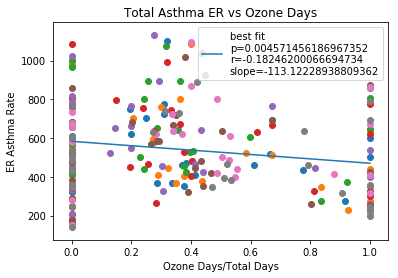

In [84]:
allOzoneData=[]
allERVisit=[]
for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaERN[f'ozoneDivTotal_{year}'],gaAQIAndAsthmaERN[f'{year}'])
    allOzoneData.extend(gaAQIAndAsthmaERN[f'ozoneDivTotal_{year}'])
    allERVisit.extend(gaAQIAndAsthmaERN[f'{year}'])
    #plt.legend('f{year}')
plt.title('Total Asthma ER vs Ozone Days')

m,b,r,p,_=stats.linregress(allOzoneData, allERVisit)
    
#     #fit = slope * gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'] + intercept
xmax, xmin=max(allOzoneData), min(allOzoneData)
plt.xlabel('Ozone Days/Total Days')
#plt.plot(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], fit,'b--')
#
plt.plot([xmin,xmax],[m*xmin+b,m*xmax+b])
plt.legend([f'best fit\np={p}\nr={r}\nslope={m}'])
plt.ylabel('ER Asthma Rate')
plt.savefig(f'../Images/totalsChildrenOzoneDays_vs_erAsthmaVisits_{year}.png',bbox_inches='tight')

In [57]:
allOzoneData

[0.20054945054945056,
 0.2493150684931507,
 0.37534246575342467,
 0.0,
 0.38328530259365995,
 0.0,
 1.0,
 0.2876712328767123,
 0.19726027397260273,
 0.0,
 1.0,
 0.0,
 0.3095890410958904,
 0.6100278551532033,
 0.3698630136986301,
 0.0,
 0.336986301369863,
 0.0,
 0.0,
 0.7769784172661871,
 0.3095890410958904,
 0.4136986301369863,
 0.31868131868131866,
 0.6666666666666666,
 0.0,
 0.2774725274725275,
 0.2054794520547945,
 0.4383561643835616,
 0.0,
 0.4037854889589905,
 0.0,
 1.0,
 0.3506849315068493,
 0.29863013698630136,
 0.0,
 1.0,
 0.0,
 0.3643835616438356,
 0.5837988826815642,
 0.3241758241758242,
 0.0,
 0.3756906077348066,
 0.0,
 0.0,
 0.8352059925093633,
 0.273972602739726,
 0.29120879120879123,
 0.4005524861878453,
 0.6703296703296703,
 0.0,
 0.28688524590163933,
 0.24316939890710382,
 0.3825136612021858,
 0.0,
 0.4083333333333333,
 0.0,
 1.0,
 0.22802197802197802,
 0.2568306010928962,
 0.0,
 1.0,
 0.0,
 0.3633879781420765,
 0.5988857938718662,
 0.39669421487603307,
 0.0,
 0.3774647

In [58]:
allERVisit

[987.5,
 1424.6,
 627.3,
 1338.5,
 1083.3,
 937.6,
 511.7,
 597.7,
 1816.4,
 1613.4,
 1128.5,
 831.8,
 1620.6,
 540.5,
 943.4,
 398.3,
 628.7,
 1009.2,
 981.7,
 462.4,
 1112.3,
 782.5,
 2594.4,
 1080.6,
 191.0,
 1022.7,
 1461.3,
 837.0,
 1340.1,
 1093.9,
 249.6,
 509.6,
 663.2,
 1810.1,
 1742.0,
 1229.8,
 894.3,
 1617.2,
 732.0,
 942.8,
 452.5,
 680.1,
 858.4,
 1117.9,
 297.4,
 854.7,
 801.3,
 2349.2,
 1074.6,
 107.8,
 977.0,
 1623.7,
 825.4,
 1643.7,
 1239.8,
 907.3,
 419.6,
 881.9,
 2044.7,
 1701.5,
 1485.6,
 1002.4,
 1837.2,
 828.3,
 1090.9,
 531.8,
 801.4,
 882.3,
 948.1,
 233.4,
 867.7,
 830.2,
 2353.1,
 1594.9,
 263.4,
 928.5,
 1594.6,
 865.5,
 1360.7,
 1263.3,
 1247.1,
 513.8,
 513.5,
 1817.6,
 1740.4,
 1525.0,
 996.9,
 1085.9,
 868.7,
 1013.3,
 526.3,
 730.5,
 807.7,
 761.8,
 329.8,
 1262.4,
 895.3,
 2314.4,
 1412.7,
 207.2,
 941.5,
 1454.0,
 831.4,
 1059.6,
 1226.0,
 1212.8,
 494.0,
 675.1,
 1639.8,
 1544.2,
 1561.7,
 907.7,
 808.2,
 909.3,
 918.5,
 520.7,
 743.5,
 926.6,
 723

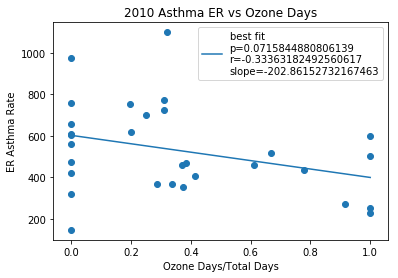

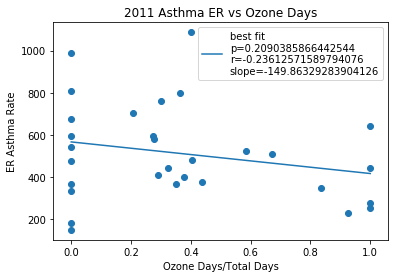

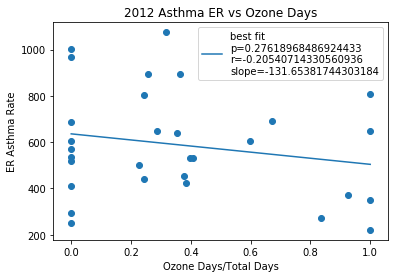

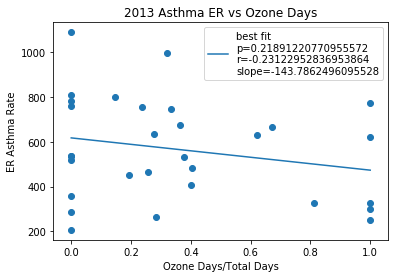

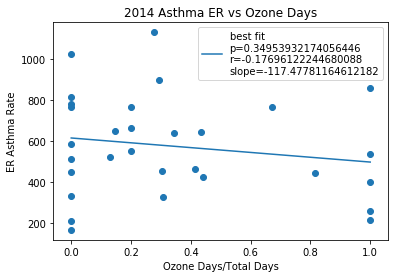

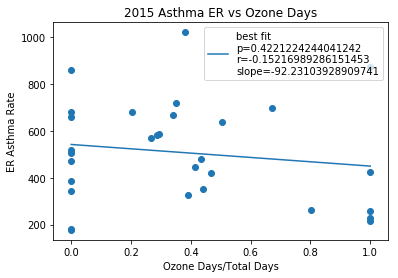

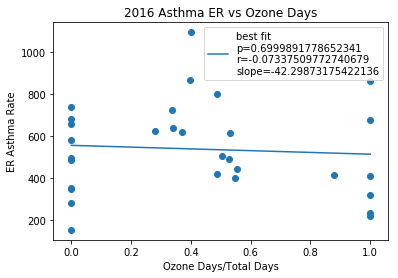

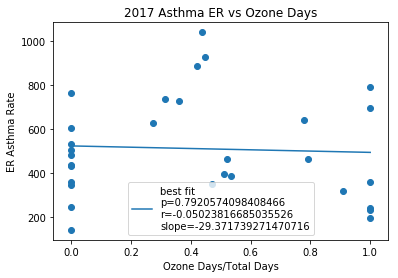

In [86]:
for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaERN[f'ozoneDivTotal_{year}'],gaAQIAndAsthmaERN[f'{year}'], )
    plt.title(f'{year} Asthma ER vs Ozone Days')
    m,b,r,p,_=stats.linregress(gaAQIAndAsthmaERN[f'ozoneDivTotal_{year}'], gaAQIAndAsthmaERN[f'{year}'])
    
    #fit = slope * gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'] + intercept
    xmax, xmin=gaAQIAndAsthmaERN[f'ozoneDivTotal_{year}'].max(), gaAQIAndAsthmaERN[f'ozoneDivTotal_{year}'].min()
    plt.xlabel('Ozone Days/Total Days')
#     plt.plot(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], fit,'b--')
    plt.plot([xmin,xmax],[m*xmin+b,m*xmax+b])
    plt.legend([f'best fit\np={p}\nr={r}\nslope={m}'])
    plt.ylabel('ER Asthma Rate')
    plt.savefig(f'../Images/childrenOzoneDays_vs_erAsthmaVisits_{year}.png',bbox_inches='tight')
    plt.show()
    

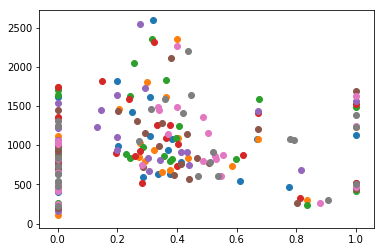

In [60]:
for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'],gaAQIAndAsthmaER[f'{year}_ER Visit Rate'])

In [87]:
gaAQIAndAsthmaERN.columns

Index(['County', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'Selected Years Total', 'Days with AQI_2010',
       'Days with AQI_2011', 'Days with AQI_2012', 'Days with AQI_2013',
       'Days with AQI_2014', 'Days with AQI_2015', 'Days with AQI_2016',
       'Days with AQI_2017', 'Days Ozone_2010', 'Days Ozone_2011',
       'Days Ozone_2012', 'Days Ozone_2013', 'Days Ozone_2014',
       'Days Ozone_2015', 'Days Ozone_2016', 'Days Ozone_2017',
       'Days PM10_2010', 'Days PM10_2011', 'Days PM10_2012', 'Days PM10_2013',
       'Days PM10_2014', 'Days PM10_2015', 'Days PM10_2016', 'Days PM10_2017',
       'ozoneDivTotal_2010', 'ozoneDivTotal_2011', 'ozoneDivTotal_2012',
       'ozoneDivTotal_2013', 'ozoneDivTotal_2014', 'ozoneDivTotal_2015',
       'ozoneDivTotal_2016', 'ozoneDivTotal_2017'],
      dtype='object')

In [88]:
aqiGADfPivot['Good Days'].head()

Year,2010,2011,2012,2013,2014,2015,2016,2017
County,,,,,,,,
Bibb,160.0,174.0,214.0,253.0,211.0,269.0,267.0,284.0
Charlton,107.0,93.0,114.0,112.0,107.0,117.0,112.0,43.0
Chatham,183.0,176.0,232.0,244.0,251.0,299.0,304.0,289.0
Chattooga,203.0,202.0,217.0,233.0,227.0,173.0,217.0,232.0
Clarke,205.0,212.0,247.0,271.0,239.0,302.0,295.0,314.0


In [89]:
#good days, median aqi, unhealth days
aqiGADfPivot['Median AQI'].head()

Year,2010,2011,2012,2013,2014,2015,2016,2017
County,,,,,,,,
Bibb,53.0,52.0,47.0,43.0,47.0,41.0,42.0,40.0
Charlton,30.0,32.0,27.0,24.0,25.0,24.0,23.0,25.0
Chatham,50.0,52.0,44.0,42.0,43.0,38.0,39.0,38.0
Chattooga,41.0,39.0,39.0,37.0,36.0,36.0,42.0,36.0
Clarke,46.0,48.0,43.0,40.0,42.0,38.0,40.0,38.0


In [90]:
mAQIAndGoodDays=aqiGADfPivot[['Median AQI','Good Days']]

In [91]:
#mAQIAndGoodDays
mAQIAndGoodDays.columns = ['_'.join(tuple(map(str, t))) for t in mAQIAndGoodDays.columns.values]

In [93]:
mAQIAndGoodDays.head()

,County,Median AQI_2010,Median AQI_2011,Median AQI_2012,Median AQI_2013,Median AQI_2014,Median AQI_2015,Median AQI_2016,Median AQI_2017,Good Days_2010,Good Days_2011,Good Days_2012,Good Days_2013,Good Days_2014,Good Days_2015,Good Days_2016,Good Days_2017
0,Bibb,53.0,52.0,47.0,43.0,47.0,41.0,42.0,40.0,160.0,174.0,214.0,253.0,211.0,269.0,267.0,284.0
1,Charlton,30.0,32.0,27.0,24.0,25.0,24.0,23.0,25.0,107.0,93.0,114.0,112.0,107.0,117.0,112.0,43.0
2,Chatham,50.0,52.0,44.0,42.0,43.0,38.0,39.0,38.0,183.0,176.0,232.0,244.0,251.0,299.0,304.0,289.0
3,Chattooga,41.0,39.0,39.0,37.0,36.0,36.0,42.0,36.0,203.0,202.0,217.0,233.0,227.0,173.0,217.0,232.0
4,Clarke,46.0,48.0,43.0,40.0,42.0,38.0,40.0,38.0,205.0,212.0,247.0,271.0,239.0,302.0,295.0,314.0


In [92]:
mAQIAndGoodDays=mAQIAndGoodDays.reset_index()

In [101]:
gaAQIAndAsthmaERN=gaAQIAndAsthmaER.merge(mAQIAndGoodDays, left_on=['County'], right_on=['County'], how='inner')

In [104]:
gaAQIAndAsthmaERN=gaAQIAndAsthmaERN.dropna(axis=0, how='any', inplace=False)
#gaAQIAndAsthmaERN

In [105]:
gaAQIAndAsthmaERN['County'].count()

30

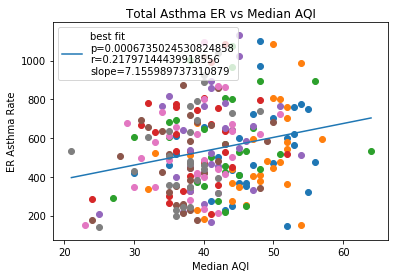

In [107]:
#mAQI vs erAsthma
allMedianAQIData=[]
allERVisit=[]


for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaERN[f'Median AQI_{year}'],gaAQIAndAsthmaERN[f'{year}'])
    allMedianAQIData.extend(gaAQIAndAsthmaERN[f'Median AQI_{year}'])
    allERVisit.extend(gaAQIAndAsthmaERN[f'{year}'])
    #plt.legend('f{year}')
plt.title('Total Asthma ER vs Median AQI')

m,b,r,p,_=stats.linregress(allMedianAQIData, allERVisit)
    
#     #fit = slope * gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'] + intercept
xmax, xmin=max(allMedianAQIData), min(allMedianAQIData)
plt.xlabel('Median AQI')
#plt.plot(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], fit,'b--')
#
plt.plot([xmin,xmax],[m*xmin+b,m*xmax+b])
plt.legend([f'best fit\np={p}\nr={r}\nslope={m}'])
plt.ylabel('ER Asthma Rate')
plt.savefig(f'../Images/totalsChildrenMAQIDays_vs_erAsthmaVisits_{year}.png',bbox_inches='tight')    

In [109]:
allMedianAQIData

[53.0,
 50.0,
 46.0,
 53.0,
 50.0,
 36.0,
 44.0,
 45.0,
 55.0,
 48.0,
 45.0,
 56.0,
 54.0,
 35.0,
 47.0,
 55.0,
 46.0,
 52.0,
 53.0,
 44.0,
 47.0,
 45.0,
 48.0,
 36.0,
 52.0,
 52.0,
 52.0,
 48.0,
 50.0,
 49.0,
 40.0,
 46.0,
 44.0,
 52.0,
 54.0,
 44.0,
 51.0,
 51.0,
 33.0,
 50.0,
 52.0,
 47.0,
 52.0,
 57.0,
 45.0,
 47.0,
 48.0,
 50.0,
 38.0,
 54.0,
 47.0,
 44.0,
 43.0,
 44.0,
 46.0,
 35.0,
 43.0,
 41.0,
 56.0,
 38.0,
 43.0,
 64.0,
 48.0,
 30.0,
 45.0,
 45.0,
 43.0,
 43.0,
 51.0,
 42.0,
 43.0,
 48.0,
 44.0,
 36.0,
 46.0,
 43.0,
 42.0,
 40.0,
 40.0,
 43.0,
 32.0,
 37.0,
 35.0,
 48.0,
 43.0,
 36.0,
 52.0,
 41.0,
 33.0,
 40.0,
 42.0,
 38.0,
 38.0,
 36.0,
 38.0,
 39.0,
 44.0,
 41.0,
 31.0,
 41.0,
 47.0,
 43.0,
 42.0,
 43.0,
 41.0,
 35.0,
 40.0,
 38.0,
 51.0,
 45.0,
 41.0,
 54.0,
 44.0,
 37.0,
 41.0,
 47.0,
 40.0,
 46.0,
 38.0,
 38.0,
 41.0,
 45.0,
 45.0,
 34.0,
 41.0,
 41.0,
 38.0,
 38.0,
 39.0,
 42.0,
 28.0,
 37.0,
 35.0,
 50.0,
 42.0,
 37.0,
 38.0,
 49.0,
 34.0,
 40.0,
 48.0,
 36.0,
 35.0,

In [111]:
for year in np.arange(2010,2018):
    gaAQIAndAsthmaERN[f'goodDaysDivTotal_{year}']=gaAQIAndAsthmaERN[f'Good Days_{year}']/gaAQIAndAsthmaERN[f'Days with AQI_{year}']

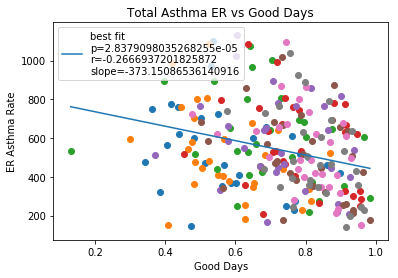

In [112]:
#goodDAys vs erAsthma
allGoodDaysByTotal=[]
allERVisit=[]

for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaERN[f'goodDaysDivTotal_{year}'],gaAQIAndAsthmaERN[f'{year}'])
    allGoodDaysByTotal.extend(gaAQIAndAsthmaERN[f'goodDaysDivTotal_{year}'])
    allERVisit.extend(gaAQIAndAsthmaERN[f'{year}'])
    #plt.legend('f{year}')
plt.title('Total Asthma ER vs Good Days')

m,b,r,p,_=stats.linregress(allGoodDaysByTotal, allERVisit)
    
#     #fit = slope * gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'] + intercept
xmax, xmin=max(allGoodDaysByTotal), min(allGoodDaysByTotal)
plt.xlabel('Good Days')
#plt.plot(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], fit,'b--')
#
plt.plot([xmin,xmax],[m*xmin+b,m*xmax+b])
plt.legend([f'best fit\np={p}\nr={r}\nslope={m}'])
plt.ylabel('ER Asthma Rate')
plt.savefig(f'../Images/totalsChildrenTGoodDaysByTDays_vs_erAsthmaVisits_{year}.png',bbox_inches='tight')  

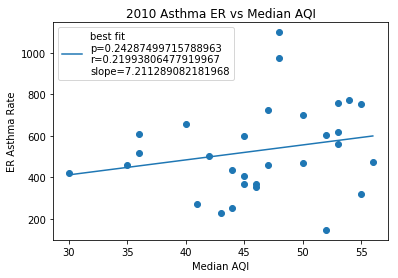

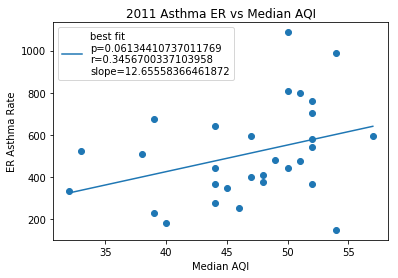

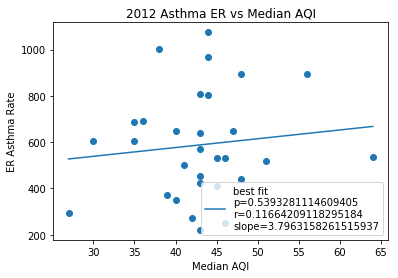

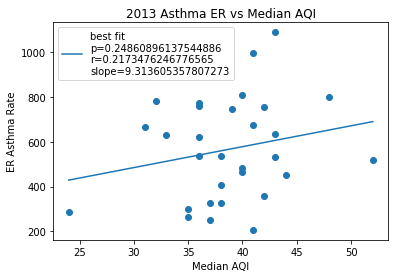

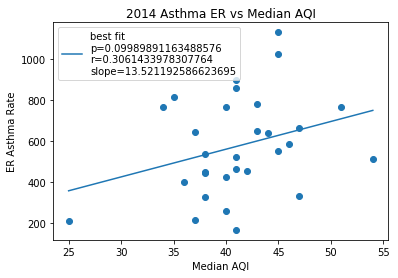

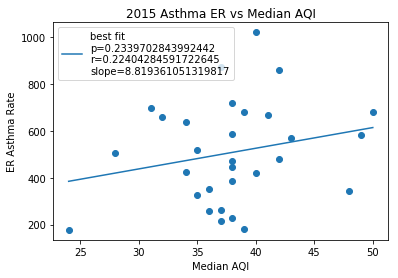

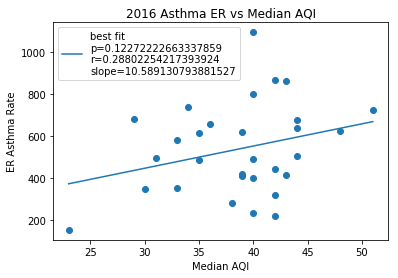

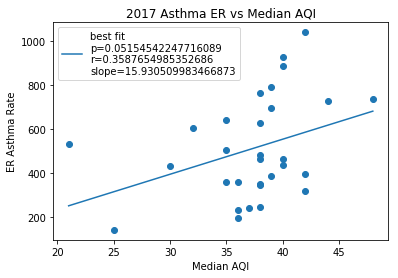

In [114]:
#mAQI vs erAsthma
for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaERN[f'Median AQI_{year}'],gaAQIAndAsthmaERN[f'{year}'])
    plt.title(f'{year} Asthma ER vs Median AQI')
    m,b,r,p,_=stats.linregress(gaAQIAndAsthmaERN[f'Median AQI_{year}'], gaAQIAndAsthmaERN[f'{year}'])
    
    #fit = slope * gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'] + intercept
    xmax, xmin=gaAQIAndAsthmaERN[f'Median AQI_{year}'].max(), gaAQIAndAsthmaERN[f'Median AQI_{year}'].min()
    plt.xlabel('Median AQI')
#     plt.plot(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], fit,'b--')
    plt.plot([xmin,xmax],[m*xmin+b,m*xmax+b])
    plt.legend([f'best fit\np={p}\nr={r}\nslope={m}'])
    plt.ylabel('ER Asthma Rate')
    plt.savefig(f'../Images/childrenMAQI_vs_erAsthmaVisits_{year}.png',bbox_inches='tight')
    plt.show()
   

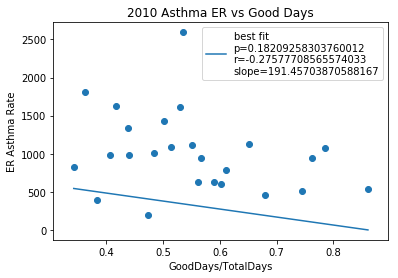

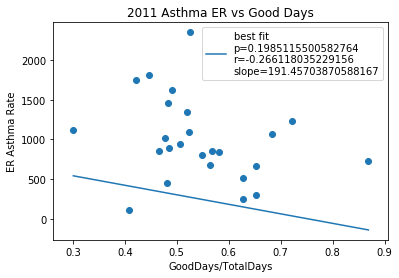

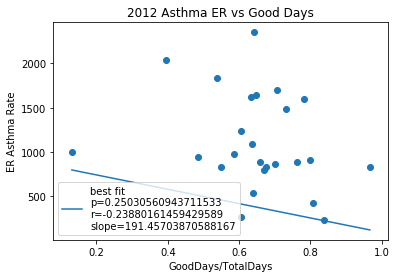

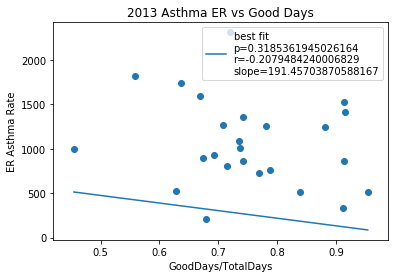

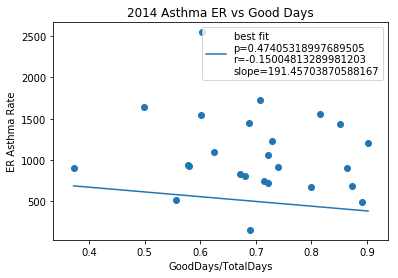

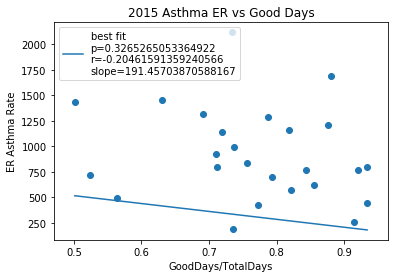

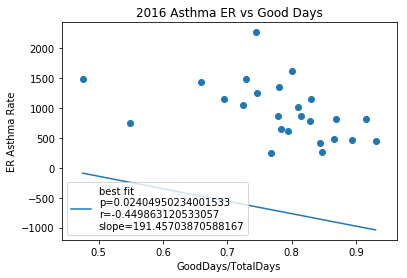

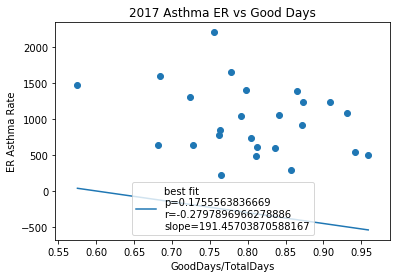

In [94]:
#goodDAys vs erAsthma
for year in np.arange(2010,2018):
    plt.scatter(gaAQIAndAsthmaER[f'goodDaysDivTotal_{year}'],gaAQIAndAsthmaER[f'{year}_ER Visit Rate'])
    plt.title(f'{year} Asthma ER vs Good Days')
    mG,bG,rG,pG,_=stats.linregress(gaAQIAndAsthmaER[f'goodDaysDivTotal_{year}'], gaAQIAndAsthmaER[f'{year}_ER Visit Rate'])
    
    #fit = slope * gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'] + intercept
    xmaxG, xminG=gaAQIAndAsthmaER[f'goodDaysDivTotal_{year}'].max(), gaAQIAndAsthmaER[f'goodDaysDivTotal_{year}'].min()
    plt.xlabel('GoodDays/TotalDays')
#     plt.plot(gaAQIAndAsthmaER[f'ozoneDivTotal_{year}'], fit,'b--')
    plt.plot([xminG,xmaxG],[mG*xminG+b,mG*xmaxG+b])
    plt.legend([f'best fit\np={pG}\nr={rG}\nslope={m}'])
    plt.ylabel('ER Asthma Rate')
    plt.savefig(f'../Images/childrenGoodDays_vs_erAsthmaVisits_{year}.png',bbox_inches='tight')
    plt.show()


In [95]:
goodDaysDivTotal_2010

NameError: name 'goodDaysDivTotal_2010' is not defined

In [116]:
gaAQIAndAsthmaERN.count

<bound method DataFrame.count of         County    2010    2011    2012    2013    2014    2015    2016  \
0         Bibb   619.1   579.8   650.0   636.0   662.1   668.7   866.7   
1     Charlton   420.2   335.3   293.3   286.7   209.4   177.4   152.0   
2      Chatham   701.5   704.5   802.4   753.9   650.7   585.8   618.5   
3    Chattooga   272.9   229.3   373.2   326.2   401.0   256.8   318.2   
4       Clarke   351.4   378.4   424.9   464.3   454.0   447.9   489.1   
5      Clayton   758.8   808.3   965.8   807.7   780.1   682.6   737.1   
6         Cobb   469.1   479.4   530.9   529.8   525.0   480.8   504.0   
7       Coffee   609.5   184.3   604.6   779.7   817.5   505.7   495.2   
8     Columbia   250.8   252.9   221.1   250.3   260.0   215.9   234.0   
9       Coweta   370.4   369.5   500.3   262.8   329.0   324.4   419.1   
10      Dawson   228.3   276.1   352.3   299.7   217.8   227.4   216.1   
11      DeKalb   752.3   759.1   892.8   796.8   767.4   680.9   722.7   
12   